In [2]:
%matplotlib inline
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

In [21]:
def smart_bin(s1, s2):
    extent = (
        np.percentile(s1, 1), 
        np.percentile(s1, 99), 
        np.percentile(s2, 1),
        np.percentile(s2, 99),
    )
    plt.hexbin(s1, s2, extent=extent, gridsize=30, bins="log")

In [8]:
sensor_raw = pd.read_csv("~/Downloads/HT_Sensor_UCIsubmission/HT_Sensor_dataset.dat",delim_whitespace=True)

In [12]:
sensor_raw.head(n=5)

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [10]:
sensor = pd.read_csv("../data/home_sensor.csv")

In [3]:
sensor.head()

,Unnamed: 0,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,660521,69,1.375478,12.4730,10.30640,10.43380,11.6242,11.39630,16.2672,6.12705,7.18148,27.7269,57.9040
1,493175,52,0.960129,12.1085,8.16576,8.07454,9.2805,28.48810,16.5617,4.27128,4.99414,27.0012,55.7807
2,37772,3,0.870476,12.9474,10.60830,10.57030,11.7721,13.57100,14.2436,6.61071,3.74751,25.5093,57.4164
3,152226,17,-0.721705,10.2729,5.68045,5.73456,6.5767,7.73764,9.6601,3.49400,3.73397,28.0666,72.2964
4,97384,10,0.243011,13.0588,10.47820,10.56790,11.8497,14.73710,13.1154,5.44280,5.95612,27.6979,51.1467


In [35]:
sensor.describe()

,Unnamed: 0,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
count,928991.0000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,464495.0000,49.256372,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023
std,268176.7463,28.453089,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784
min,0.0000,0.000000,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400
25%,232247.5000,25.000000,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100
50%,464495.0000,49.000000,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800
75%,696742.5000,73.000000,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500
max,928990.0000,99.000000,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500


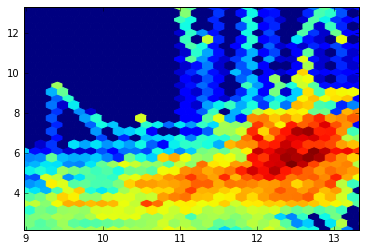

In [34]:
smart_bin(sensor.R1, sensor.R8)

# Room

In [3]:
df = pd.concat([
        pd.read_csv("./rawdata/datatest.txt"),
        pd.read_csv("./rawdata/datatest2.txt"),
        pd.read_csv("./rawdata/datatraining.txt")])

In [12]:
df[[0,1,2,3,4,5]].head(n=10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767
145,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.000000,0.004779
146,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776
147,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.000000,0.004783
148,2015-02-02 14:26:59,23.7540,26.350,476.000000,803.200000,0.004794
149,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796


In [15]:
dfi = df.reset_index()

In [16]:
np.random.seed(0)
room = dfi.reindex(np.random.permutation(dfi.index))
room.to_csv("../data/room2.csv", index=False)

In [17]:
room.head()

,index,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
14756,2340,2015-02-06 08:50:00,20.890000,19.790000,433.0,635.750000,0.003016,1
19000,6584,2015-02-09 07:34:00,19.390000,26.100000,0.0,465.500000,0.003629,0
18894,6478,2015-02-09 05:48:00,19.390000,26.790000,0.0,465.000000,0.003725,0
8541,5877,2015-02-15 16:44:00,21.000000,31.890000,26.5,675.750000,0.004908,0
9602,6938,2015-02-16 10:25:00,21.426667,27.166667,453.0,960.666667,0.004288,1
